        value   group
0   10.059669  CK 24h
1    9.885453  CK 24h
2    9.972561  CK 24h
3    8.230401     24h
4    9.014373     24h
5    8.622387     24h
6    9.428136  CK 48h
7   10.691202  CK 48h
8   10.059669  CK 48h
9    6.727787     48h
10   7.925523     48h
11   7.326655     48h

0.004329310518824305
0.005546755807549662


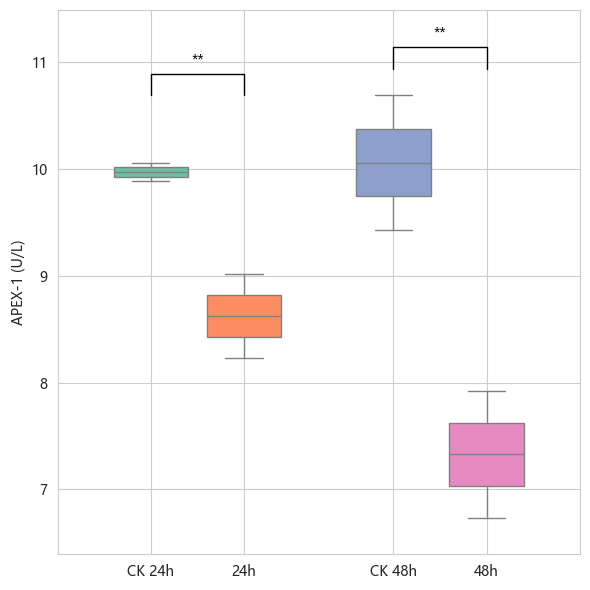

In [34]:
import pandas as pd
df = pd.read_excel("./data.300.xlsx")
print(df)
print()

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import matplotlib as mpl

# 1. 自定义 x 位置：间距随意调
pos_map = {'CK 24h': 1,
           '24h': 1.5,      # 与 val 只隔 0.8
           'CK 48h': 2.3,
           '48h': 2.8}      # 与 val 只隔 0.8
order = list(pos_map.keys())
positions = [pos_map[g] for g in order]

# 2. 手动 boxplot
fig, ax = plt.subplots(figsize=(6, 6))

# 准备箱体数据
box_data = [df[df['group'] == g]['value'].values for g in order]
box_plot = ax.boxplot(box_data, positions=positions, widths=0.4,
                      patch_artist=True, showmeans=False)

# 颜色照旧
colors = sns.color_palette('Set2', len(order))
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('grey')
    patch.set_linewidth(1)
grey = '#808080'
for item in ['medians', 'whiskers', 'caps', 'fliers']:
    plt.setp(box_plot[item], color=grey, linewidth=1)

# 3. 显著性检验
def add_sig(ax, g1, g2, y_top, dh=0.2):
    x1, x2 = pos_map[g1], pos_map[g2]
    y1 = y2 = y_top + dh
    ax.plot([x1, x1, x2, x2], [y_top, y1, y2, y_top], lw=1, color='black')
    t, p = stats.ttest_ind(df[df['group'] == g1]['value'],
                           df[df['group'] == g2]['value'])
    sig = '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'ns'
    ax.text((x1 + x2) / 2, y1 + 0.05, sig,
            ha='center', va='bottom', color='black')
    print(p)
    return y1 + 0.05

# 4. 加两条显著线
top = max([d.max() for d in box_data])
top = add_sig(ax, 'CK 24h', '24h', top, dh=0.2)
top = add_sig(ax, 'CK 48h', '48h', top, dh=0.2)

# 5. 坐标轴装饰
ax.set_xticks(positions)
ax.set_xticklabels(order)
ax.set_ylabel('APEX-1 (U/L)')
ax.set_xlabel(None)
ax.set_ylim(df['value'].min() * 0.95, top + 0.3)
plt.tight_layout()
plt.savefig('300.png', dpi=300, bbox_inches='tight')
plt.savefig('300.pdf', dpi=300, bbox_inches='tight')
plt.savefig('300.svg', dpi=300, bbox_inches='tight')
plt.show()
plt.close("all")

        value   group
0    7.533537     24h
1    8.448171     24h
2    7.990854     24h
3    8.056185     48h
4    8.361063     48h
5    8.208624     48h
6    9.537021  CK 24h
7    9.057927  CK 24h
8    9.297474  CK 24h
9   10.669425  CK 48h
10   9.079704  CK 48h
11   9.874564  CK 48h

0.011840388232099734
0.023476055504951878


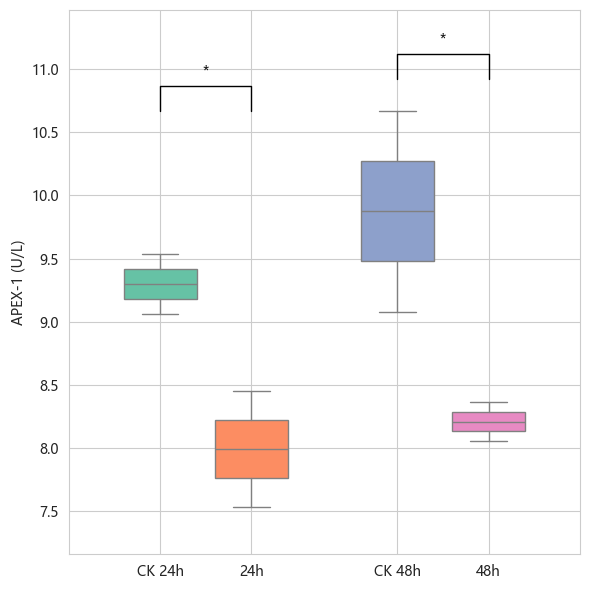

In [35]:
import pandas as pd
df = pd.read_excel("./data.500.xlsx")
print(df)
print()

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import matplotlib as mpl

# 1. 自定义 x 位置：间距随意调
pos_map = {'CK 24h': 1,
           '24h': 1.5,      # 与 val 只隔 0.8
           'CK 48h': 2.3,
           '48h': 2.8}      # 与 val 只隔 0.8
order = list(pos_map.keys())
positions = [pos_map[g] for g in order]

# 2. 手动 boxplot
fig, ax = plt.subplots(figsize=(6, 6))

# 准备箱体数据
box_data = [df[df['group'] == g]['value'].values for g in order]
box_plot = ax.boxplot(box_data, positions=positions, widths=0.4,
                      patch_artist=True, showmeans=False)

# 颜色照旧
colors = sns.color_palette('Set2', len(order))
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('grey')
    patch.set_linewidth(1)
grey = '#808080'
for item in ['medians', 'whiskers', 'caps', 'fliers']:
    plt.setp(box_plot[item], color=grey, linewidth=1)

# 3. 显著性检验
def add_sig(ax, g1, g2, y_top, dh=0.2):
    x1, x2 = pos_map[g1], pos_map[g2]
    y1 = y2 = y_top + dh
    ax.plot([x1, x1, x2, x2], [y_top, y1, y2, y_top], lw=1, color='black')
    t, p = stats.ttest_ind(df[df['group'] == g1]['value'],
                           df[df['group'] == g2]['value'])
    sig = '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'ns'
    ax.text((x1 + x2) / 2, y1 + 0.05, sig,
            ha='center', va='bottom', color='black')
    print(p)
    return y1 + 0.05

# 4. 加两条显著线
top = max([d.max() for d in box_data])
top = add_sig(ax, 'CK 24h', '24h', top, dh=0.2)
top = add_sig(ax, 'CK 48h', '48h', top, dh=0.2)

# 5. 坐标轴装饰
ax.set_xticks(positions)
ax.set_xticklabels(order)
ax.set_ylabel('APEX-1 (U/L)')
ax.set_xlabel(None)
ax.set_ylim(df['value'].min() * 0.95, top + 0.3)
plt.tight_layout()
plt.savefig('500.png', dpi=300, bbox_inches='tight')
plt.savefig('500.pdf', dpi=300, bbox_inches='tight')
plt.savefig('500.svg', dpi=300, bbox_inches='tight')
plt.show()
plt.close("all")